In [7]:
import pandas as pd
import pandas as pd
import numpy as np
from numpy.linalg import svd
import statsmodels.api as sm

In [2]:

file_accidents = 'dftRoadSafety_Accidents_2016.csv'
df_accidents = pd.read_csv(file_accidents)
print(df_accidents.head())
print(df_accidents.info())
print(df_accidents.isnull().sum())
print(df_accidents.describe())

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2016010000005               519310.0                188730.0  -0.279323   
1  2016010000006               551920.0                174560.0   0.184928   
2  2016010000008               505930.0                183850.0  -0.473837   
3  2016010000016               527770.0                168930.0  -0.164442   
4  2016010000018               510740.0                177230.0  -0.406580   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.584754             1                  3                   2   
1  51.449595             1                  3                   1   
2  51.543563             1                  3                   1   
3  51.404958             1                  3                   1   
4  51.483139             1                  3                   2   

   Number_of_Casualties        Date  ...  Pedestrian_Crossing-Human_Control  \
0                     1  01/11/2016  

In [3]:
file_vehicles = 'Veh.csv'
df_vehicles = pd.read_csv(file_vehicles)
print(df_vehicles.head())
print(df_vehicles.info())
print(df_vehicles.isnull().sum())
print(df_vehicles.describe())


  Accident_Index  Vehicle_Reference  Vehicle_Type  Towing_and_Articulation  \
0  2016010000005                  1             8                        0   
1  2016010000005                  2             2                        0   
2  2016010000006                  1             9                        0   
3  2016010000008                  1             9                        0   
4  2016010000016                  1            11                        0   

   Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
0                  6                                 0                  0   
1                 18                                 0                  0   
2                 18                                 0                  2   
3                 18                                 0                  4   
4                 18                                 0                  1   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0         

In [4]:
file_make_model = 'MakeModel2016.csv'
df_make_model = pd.read_csv(file_make_model)
print(df_make_model.head())
print(df_make_model.info())

print(df_make_model.isnull().sum())

print(df_make_model.describe())

  Accident_Index  accyr  Vehicle_Reference  Vehicle_Type  \
0  2016010000005   2016                  1             8   
1  2016010000005   2016                  2             2   
2  2016010000006   2016                  1             9   
3  2016010000008   2016                  1             9   
4  2016010000016   2016                  1            11   

   Towing_and_Articulation  Vehicle_Manoeuvre  \
0                        0                  6   
1                        0                 18   
2                        0                 18   
3                        0                 18   
4                        0                 18   

   Vehicle_Location-Restricted_Lane  Junction_Location  \
0                                 0                  0   
1                                 0                  0   
2                                 0                  2   
3                                 0                  4   
4                                 0                  1

In [5]:
file_cas = 'Cas.csv'
df_cas = pd.read_csv(file_cas)

print(df_cas.head())
print(df_cas.info())
print(df_cas.isnull().sum()) # Contar valores faltantes
print(df_cas.describe())

  Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0  2016010000005                  2                   1               1   
1  2016010000006                  1                   1               1   
2  2016010000008                  1                   1               1   
3  2016010000016                  1                   1               2   
4  2016010000018                  2                   1               1   

   Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  Casualty_Severity  \
0                1               23                     5                  3   
1                2               36                     7                  3   
2                1               24                     5                  3   
3                2               59                     9                  3   
4                1               28                     6                  3   

   Pedestrian_Location  Pedestrian_Movement  Car_Passenger  \
0     

# Pregunta 1

### 1. Resumen Descriptivo de "dftRoadSafety_Accidents_2016.csv"
- **Variables Dependientes:** 
  - `Number_of_Casualties`: Número de personas lesionadas en el accidente. Es una variable dependiente clave para el análisis, ya que se relaciona con la cantidad de heridos en los accidentes.
- **Variables Independientes:** 
  - Las demás columnas como `Number_of_Vehicles`, `Day_of_Week`, `Weather_Conditions`, etc., son variables independientes que podrían influir en el número de heridos.

### 2. Resumen Descriptivo de "Veh.csv"
- **Variables Dependientes:**
  - No hay variables directamente dependientes en este conjunto de datos, pero contiene información relevante sobre los vehículos involucrados en los accidentes.
- **Variables Independientes:**
  - `Vehicle_Type`, `Age_of_Driver`, `Engine_Capacity_(CC)`, etc., son variables independientes que describen características de los vehículos y conductores.

### 3. Resumen Descriptivo de "Cas.csv"
- **Variables Dependientes:**
  - `Casualty_Severity`: La gravedad de las lesiones de las víctimas podría considerarse una variable dependiente, aunque no es directamente el número de heridos.
- **Variables Independientes:**
  - `Sex_of_Casualty`, `Age_of_Casualty`, `Casualty_Type`, etc., son variables independientes que describen las características de las víctimas de los accidentes.


### Juntandolo todo
- dftRoadSafety_Accidents_2016.csv es el dataset más directamente relevante para el análisis, por `Number_of_Casualties`


# Pregunta 2

#### Seleccion de Variables 
Vamos a concentrarnos en un subconjunto de variables, para hacer el analisis menos pesado    
* Number_of_Vehicles
* Day_of_Week
* Weather_Conditions
* Road_Surface_Conditions
* Light_Conditions
* Speed_limit

Y con esas, calcularemos el indice de condicion. Un índice de condición superior a 30 indica una multicolinealidad potencialmente problemática.

In [6]:
df = pd.read_csv('dftRoadSafety_Accidents_2016.csv')
variables_independientes = ['Number_of_Vehicles', 'Day_of_Week', 'Weather_Conditions', 
                            'Road_Surface_Conditions', 'Light_Conditions', 'Speed_limit']

X = df[variables_independientes].dropna()
X_estandarizado = (X - X.mean()) / X.std()

#Tomamos muestra porque no no tenemos tanta memoria
X_sampleada = X_estandarizado.sample(frac=0.25, random_state=42)

# Descomposición en valores singulares en la muestra
U, s, Vt = svd(X_sampleada)

# Calculando los índices de condición
indices_condicion = s / s.min()
print("Índices de Condición:", indices_condicion)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Índices de Condición: [1.32298258 1.20779304 1.13768199 1.09372342 1.04389262 1.        ]


#### No hay evidencia de problemas significativos de multicolinealidad entre las variables seleccionadas, ya que todas son mucho menores a 30

# Pregunta 3

In [11]:
variables_independientes = ['Number_of_Vehicles', 'Day_of_Week', 'Weather_Conditions', 
                            'Road_Surface_Conditions', 'Light_Conditions', 'Speed_limit']
X = df[variables_independientes]
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Asegurándose de que Y tenga el mismo índice que X

X = sm.add_constant(X)

# Inicializar variables para el proceso de selección
variables_incluidas = list(X.columns)
variables_mejor = variables_incluidas[:]
BIC_mejor = sm.OLS(y, X[variables_incluidas]).fit().bic

# Loop para la regresión escalonada
while True:
    cambios = False
    for variable in variables_incluidas:
        if variable == 'const':
            continue
        variables_prueba = list(variables_incluidas)
        variables_prueba.remove(variable)
        modelo_prueba = sm.OLS(y, X[variables_prueba]).fit()
        BIC_prueba = modelo_prueba.bic
        if BIC_prueba < BIC_mejor:
            BIC_mejor = BIC_prueba
            mejor_variable = variable
            cambios = True
    if cambios:
        variables_incluidas.remove(mejor_variable)
        variables_mejor = list(variables_incluidas)
    else:
        break

# Resultado final
modelo_final = sm.OLS(y, X[variables_mejor]).fit()
print(modelo_final.summary())

                             OLS Regression Results                             
Dep. Variable:     Number_of_Casualties   R-squared:                       0.079
Model:                              OLS   Adj. R-squared:                  0.079
Method:                   Least Squares   F-statistic:                     2351.
Date:                  Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                          15:20:57   Log-Likelihood:            -1.5585e+05
No. Observations:                136584   AIC:                         3.117e+05
Df Residuals:                    136578   BIC:                         3.118e+05
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const 

### Analisis de Resultados


1. **R-squared (R²):** 0.079. Este valor indica que aproximadamente el 7.9% de la variabilidad en la cantidad de heridos (`Number_of_Casualties`) es explicada por el modelo. Esto sugiere que aunque las variables seleccionadas tienen una relación con el número de heridos, hay otros factores no incluidos en el modelo que también influyen en esta variable.

2. **Coeficientes (coef):** 
   - `const`: El valor base (intercepto) es 0.5282. Esto representa el valor esperado de la variable dependiente cuando todas las variables independientes son 0.
   - `Number_of_Vehicles`: Por cada vehículo adicional involucrado en el accidente, se espera un aumento de 0.2584 en el número de heridos, manteniendo constantes las demás variables.
   - `Weather_Conditions`: Las condiciones meteorológicas tienen un pequeño impacto negativo (-0.0059) en el número de heridos.
   - `Road_Surface_Conditions`: Las condiciones de la superficie de la carretera contribuyen positivamente (0.0186) al número de heridos.
   - `Light_Conditions`: Las condiciones de iluminación tienen un impacto positivo (0.0147) en el número de heridos.
   - `Speed_limit`: Un aumento en el límite de velocidad está asociado con un incremento (0.0073) en el número de heridos.

3. **P-values (P>|t|):** Todas las variables en el modelo tienen un valor p significativamente bajo (menor que 0.05), lo que sugiere que todas son estadísticamente significativas en la predicción del número de heridos en accidentes.

4. **Intervalos de Confianza:** Los intervalos de confianza para los coeficientes indican el rango dentro del cual podemos estar razonablemente seguros de que se encuentran los verdaderos valores de los coeficientes.

5. **Pruebas de Diagnóstico:**
   - El test de Omnibus y el test de Jarque-Bera indican que los residuos no se distribuyen normalmente, lo cual es común en grandes conjuntos de datos.
   - El valor de Durbin-Watson cercano a 2 sugiere que no hay autocorrelación en los residuos.

El modelo seleccionado por la Stepwise Regresion indica que todas las variables incluidas son relevantes para predecir el número de heridos en accidentes de tráfico. Sin embargo, la baja R² sugiere que hay otros factores no capturados por el modelo que también son importantes.

# Pregunta 4

* Que variable escojemos?

Una variable común para transformar en análisis de regresión es una que tiene una distribución sesgada, como el número de vehículos o el límite de velocidad. Por ejemplo, Speed_limit.

In [16]:
import numpy as np
import statsmodels.api as sm

variables_independientes = ['Number_of_Vehicles', 'Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions', 'Speed_limit']
X = df[variables_independientes]
y = df['Number_of_Casualties']

X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Asegurándose de que Y tenga el mismo índice que X

# Transformación logarítmica de Speed_limit
X['Log_Speed_limit'] = np.log(X['Speed_limit'] + 1)  # +1 para manejar Speed_limit = 0

# Modelo con la variable original
X_original = sm.add_constant(X[variables_independientes])
modelo_original = sm.OLS(y, X_original).fit()

# Modelo con la variable transformada
X_transformed = sm.add_constant(X.drop(columns=['Speed_limit']))
modelo_transformado = sm.OLS(y, X_transformed).fit()

# Comparar los modelos
print("Modelo Original:\n", modelo_original.summary())
print("\nModelo Transformado:\n", modelo_transformado.summary())

Modelo Original:
                              OLS Regression Results                             
Dep. Variable:     Number_of_Casualties   R-squared:                       0.079
Model:                              OLS   Adj. R-squared:                  0.079
Method:                   Least Squares   F-statistic:                     2351.
Date:                  Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                          15:29:00   Log-Likelihood:            -1.5585e+05
No. Observations:                136584   AIC:                         3.117e+05
Df Residuals:                    136578   BIC:                         3.118e+05
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Comparación de los Modelos
1. **R-cuadrado (R²):**
   - Modelo Original: 0.079
   - Modelo Transformado: 0.080
   - **Observación:** El R² ha aumentado ligeramente en el modelo transformado, lo que indica una mejora marginal en la capacidad del modelo para explicar la variabilidad de la variable dependiente (`Number_of_Casualties`).

2. **Coeficientes (coef):**
   - `Speed_limit` en el modelo original y `Log_Speed_limit` en el modelo transformado son significativamente diferentes en términos de magnitud y interpretación. 
   - En el modelo transformado, el coeficiente de `Log_Speed_limit` es 0.3234, lo que indica que un aumento porcentual en el límite de velocidad está asociado con un aumento de 0.3234 en el logaritmo del número de heridos, manteniendo constantes las demás variables.

3. **Significancia de los Coeficientes (P>|t|):**
   - Todos los coeficientes mantienen su significancia estadística en ambos modelos.

4. **Intercepto (const):**
   - Hay un cambio notable en el valor del intercepto entre los dos modelos. Esto es esperado debido a la transformación logarítmica aplicada.

5. **Pruebas de Diagnóstico:**
   - Las pruebas de diagnóstico (Omnibus, Jarque-Bera, Durbin-Watson) son consistentes en ambos modelos, indicando que la transformación no ha afectado significativamente la distribución de los residuos ni la autocorrelación.

### Impacto de la Transformación
La transformación logarítmica de `Speed_limit` ha mejorado ligeramente el ajuste del modelo, como lo indica el aumento en R². La interpretación de la variable `Speed_limit` ahora se hace en términos de cambios porcentuales en lugar de cambios absolutos.

### Conclusión
La transformación logarítmica es útil especialmente cuando se espera que la relación entre la variable independiente y la dependiente sea no lineal.

# Pregunta 5

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np

In [17]:
variables_independientes = ['Number_of_Vehicles', 'Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions', 'Speed_limit']
X = df[variables_independientes]
y = df['Number_of_Casualties']

X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Asegurándose de que Y tenga el mismo índice que X


# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

# Inicializar el método de validación cruzada de 5 pliegues
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada y calcular el error cuadrático medio (MSE)
mse_scores = cross_val_score(modelo, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convertir a error cuadrático medio positivo
mse_scores = -mse_scores

# Calcular la raíz del error cuadrático medio (RMSE)
rmse_scores = np.sqrt(mse_scores)

# Imprimir los resultados
print("RMSE en cada pliegue: ", rmse_scores)
print("RMSE promedio: ", rmse_scores.mean())

RMSE en cada pliegue:  [0.69654746 0.73416629 0.75650863 0.82212495 0.77241165]
RMSE promedio:  0.7563517957271655


### Interpretación de los Resultados de la Validación Cruzada

1. **RMSE en Cada Fold:** 
   - Los valores de RMSE (Raíz del Error Cuadrático Medio) varían en cada pliegue, lo que indica cómo el modelo se desempeña en diferentes subconjuntos de tus datos. Los valores son [0.6965, 0.7342, 0.7565, 0.8221, 0.7724]. 
   - La variación en estos valores sugiere que el rendimiento del modelo fluctúa dependiendo de los datos específicos con los que se está entrenando y validando.

2. **RMSE Promedio:** 
   - El RMSE promedio es de aproximadamente 0.7564.
   - Este es un buen indicador general del rendimiento del modelo en todo el conjunto de datos. Un RMSE más bajo indica un mejor ajuste del modelo a los datos.

- Un RMSE promedio de 0.7564 sugiere que, en promedio, las predicciones del modelo se desvían aproximadamente 0.7564 unidades del valor real en términos de la cantidad de heridos en los accidentes.

# Pregunta 6

 Un gráfico de residuos puede ayudar a identificar si hay patrones no capturados por el modelo y si hay observaciones influyentes o atípicas.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

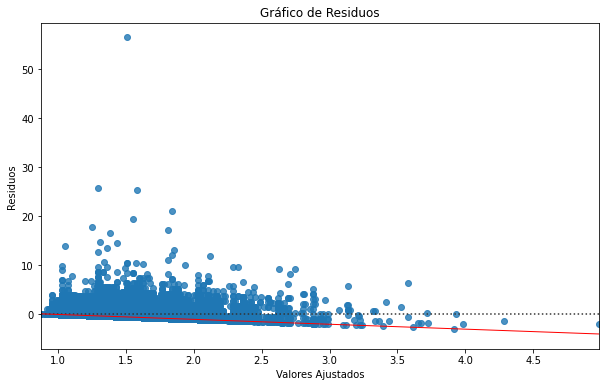

In [20]:
variables_independientes = ['Number_of_Vehicles', 'Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions', 'Speed_limit']
X = df[variables_independientes]
y = df['Number_of_Casualties']

X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()
y_clean = y[X_clean.index]  # Asegurándonos de que y tenga el mismo índice que X_clean

# Ahora ajustaremos el modelo con los datos limpios
X_clean = sm.add_constant(X_clean)
modelo = sm.OLS(y_clean, X_clean).fit()

# Calculando los residuos
residuos = modelo.resid

# Creando el gráfico de residuos
plt.figure(figsize=(10, 6))
sns.residplot(x=modelo.fittedvalues, y=residuos, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

### Interpretacion